[volver](../README.md)

# Gradient Boosting

Es un algoritmo de aprendizaje conjunto que crea modelos de predicción a partir de una serie de árboles de decisión.
Es conocido por su alta precisión y eficiencia, adecuado para tareas de predicción de eventos meteorológicos complejos.

**para nuestro caso, utilizaremos el mismo conjunto filtrado en el modelo random forest**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos WeatherAUS
data = pd.read_csv('../dataset/weatherAUS.csv')

# 1- creamos el grupo con las ciudades costeras (exploración de la evaluación 02)
grupo01 = data[data['Location'].isin(['Adelaide', 'Cairns', 'Brisbane', 'Gold Coast', 'Hobart', 'Darwin', 'Perth', 'Townsville', 'Sydney', 'Fremantle', 'Wollongong'])]

grupo01_1 = grupo01.copy()
grupo01_1['Date']  = pd.to_datetime(data['Date'])
grupo01_1['Year'] = grupo01_1['Date'].dt.year
grupo01_1['Month'] = grupo01_1['Date'].dt.month
grupo01_1['Day'] = grupo01_1['Date'].dt.day
grupo01_1['WeekDay'] = grupo01_1['Date'].dt.weekday

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
grupo01_1['Location'] = le.fit_transform(grupo01_1['Location'])


#conjunto_de_datos_para_primer_modelo = grupo01_1[['MaxTemp','MinTemp','Temp9am', 'Year','Month','Day','WindGustSpeed','WindSpeed3pm','WindSpeed9am', 'Location']]
conjunto_de_datos_para_primer_modelo = grupo01_1[['MaxTemp','MinTemp','Month','Day','WindSpeed3pm','WindSpeed9am', 'Location']]

conjunto_de_datos_para_primer_modelo = conjunto_de_datos_para_primer_modelo.dropna()

X = conjunto_de_datos_para_primer_modelo.drop(['Location'], axis=1)
y = conjunto_de_datos_para_primer_modelo['Location']

from sklearn.preprocessing import StandardScaler
stscaler= StandardScaler()
# standardization
X_scale = stscaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.33, random_state = 42)



In [2]:
# Crear y entrenar el modelo de Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

## Evaluar el modelo
### Precisión

In [3]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6000216146114774


### Matriz de confusión

In [4]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[412  64  12  11 134 201  71  13  94]
 [ 17 805  47  11   0 101  55   9  20]
 [  1  55 621  93   0   5   8 199   4]
 [  0  12  98 837   0   1   4  69   1]
 [107   3   0   0 776  33  67   2  66]
 [142  97   6   4  31 550 131  12  81]
 [ 44  63  20  12  40 115 548  29 213]
 [  3  32 275 116   0  15  22 546   7]
 [ 83  61  10   1  37  63 239   9 457]]


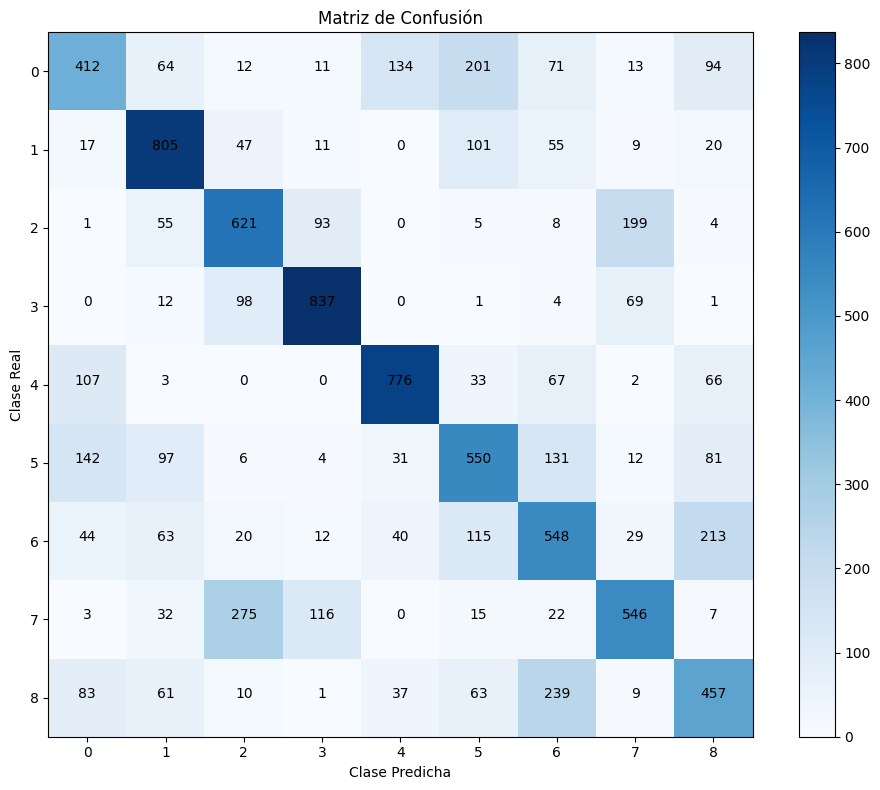

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo de matriz de confusión (sustituye con tus datos reales)
conf_matrix = confusion_matrix(y_test, y_pred)

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Matriz de Confusión')
    plt.colorbar()

    # Etiquetas de los ejes
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # Añadir valores en los cuadros
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix)):
            plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="black")

    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar la matriz de confusión
plot_confusion_matrix(conf_matrix)

### Reporte de Clasificación

In [6]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.41      0.45      1012
           1       0.68      0.76      0.71      1065
           2       0.57      0.63      0.60       986
           3       0.77      0.82      0.79      1022
           4       0.76      0.74      0.75      1054
           5       0.51      0.52      0.51      1054
           6       0.48      0.51      0.49      1084
           7       0.61      0.54      0.57      1016
           8       0.48      0.48      0.48       960

    accuracy                           0.60      9253
   macro avg       0.60      0.60      0.60      9253
weighted avg       0.60      0.60      0.60      9253



## Interpretación de los Resultados

Los resultados incluyen:

### Accuracy: 

La precisión es 0.65 ,esto quiere decir que el 65% de los aciertos el modelo podría predecir correctamente si la velocidad del viento superará los 22 km/hr.

### Confusion Matrix:

Una matriz que muestra el número de predicciones correctas e incorrectas para cada clase (superior a 22 km/hr o no).

### Classification Report:

Proporciona precision, recall, f1-score y soporte para cada clase. Ayuda a entender el rendimiento del modelo en términos de cómo maneja la precisión y la exhaustividad para cada clase.

## Interpretación General

* Accuracy: Indica qué tan bien el modelo de Gradient Boosting puede predecir si la velocidad del viento será superior a 22 km/hr basándose en la velocidad del viento en la mañana o en la tarde.
* Confusion Matrix: Permite una visualización más detallada de cómo el modelo está clasificando las muestras en las diferentes clases. Puedes observar los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
* Classification Report: Proporciona métricas detalladas como precision, recall y f1-score para cada clase. Esto te permite evaluar la precisión del modelo en cada clase y entender dónde puede haber áreas de mejora.

## Acciones Sugeridas

* Ajustar Hiperparámetros: Experimentar con diferentes valores de n_estimators y learning_rate para optimizar el rendimiento del modelo.
* Ingeniería de Características: Podriamos considerar la posibilidad de incluir más características relevantes o realizar transformaciones adicionales en las características existentes.
* Validación Cruzada: Podemos implementar validación cruzada para obtener una evaluación más robusta del rendimiento del modelo y asegurarnos que la nueva versión generaliza bien.

In [7]:
# 'MaxTemp','MinTemp','Month','Day','WindSpeed3pm','WindSpeed9am',
conjunto_de_datos_para_primer_modelo.head()

,MaxTemp,MinTemp,Month,Day,WindSpeed3pm,WindSpeed9am,Location
29497,22.4,19.5,2,1,20.0,17.0,6
29498,25.6,19.5,2,2,13.0,9.0,6
29499,24.5,21.6,2,3,2.0,17.0,6
29500,22.8,20.2,2,4,20.0,22.0,6
29501,25.7,19.7,2,5,6.0,11.0,6


In [21]:

new_data = pd.DataFrame({'MaxTemp': [22.4], 'MinTemp': [19.5],'Month':[2],'Day':[1],'WindSpeed3pm':[20.0],'WindSpeed9am':[17.0]})  # Reemplaza con tus datos reales
predictions = gb.predict(new_data)


/Users/marco/Projects/evaluacón03/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([8])

In [14]:
conjunto_de_datos_para_primer_modelo.query("Location == 1")

,MaxTemp,MinTemp,Month,Day,WindSpeed3pm,WindSpeed9am,Location
81694,25.2,10.3,7,1,15.0,6.0,1
81695,22.9,8.1,7,2,19.0,15.0,1
81696,22.4,9.7,7,3,15.0,7.0,1
81697,20.0,11.8,7,4,7.0,9.0,1
81698,16.7,12.3,7,5,7.0,11.0,1
...,...,...,...,...,...,...,...
84850,23.4,12.2,6,21,6.0,7.0,1
84851,22.7,13.7,6,22,4.0,6.0,1
84852,23.7,10.3,6,23,9.0,6.0,1
84853,24.5,10.4,6,24,2.0,2.0,1
